In [ ]:
import os
import pickle
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("features/MLP301BachDuongCombined_Features.csv")
data = data.drop(columns=["Images"], axis=1)
# data.describe()
# data.info()
# data.isnull().sum()
# data.isna().sum()

In [2]:
x = data.drop(columns=["Label"])
y = data["Label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [3]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Performance Metrics for MLP Classifier
Accuracy: 0.59
Precision: 0.61
Recall: 0.59
F1-Score: 0.59
AUC Score: 0.90



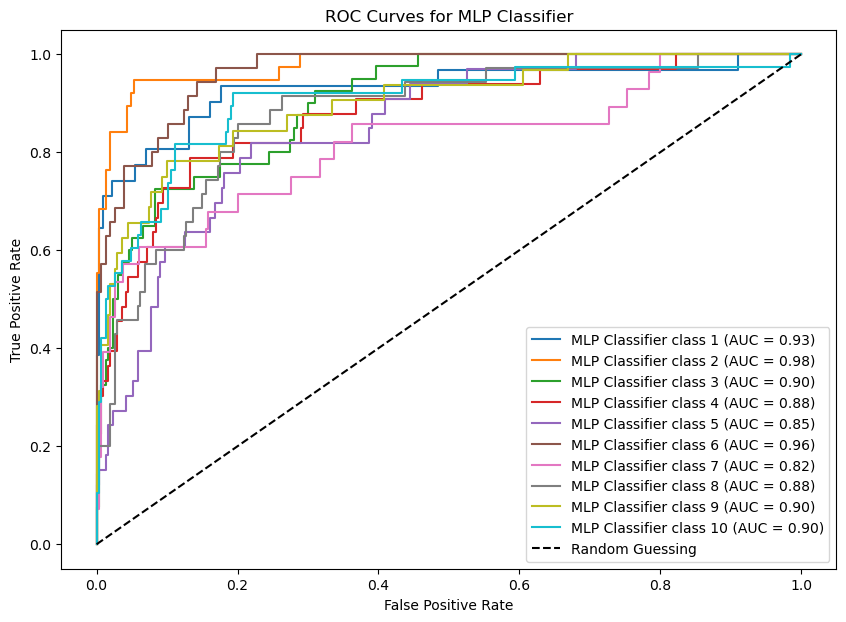

Performance Metrics for Gaussian Naive Bayes
Accuracy: 0.35
Precision: 0.48
Recall: 0.35
F1-Score: 0.35
AUC Score: 0.77



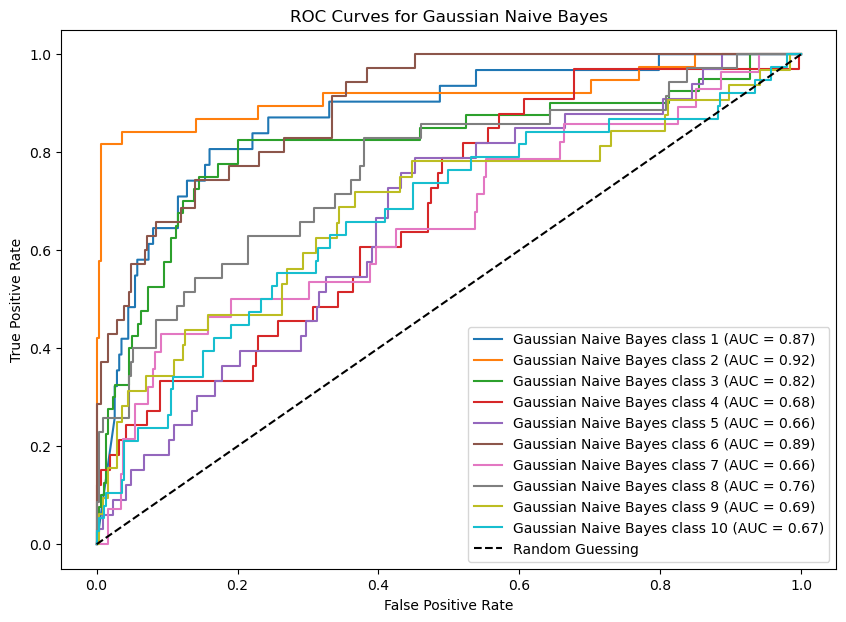

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Performance Metrics for Decision Tree
Accuracy: 0.61
Precision: 0.65
Recall: 0.61
F1-Score: 0.62
AUC Score: 0.83



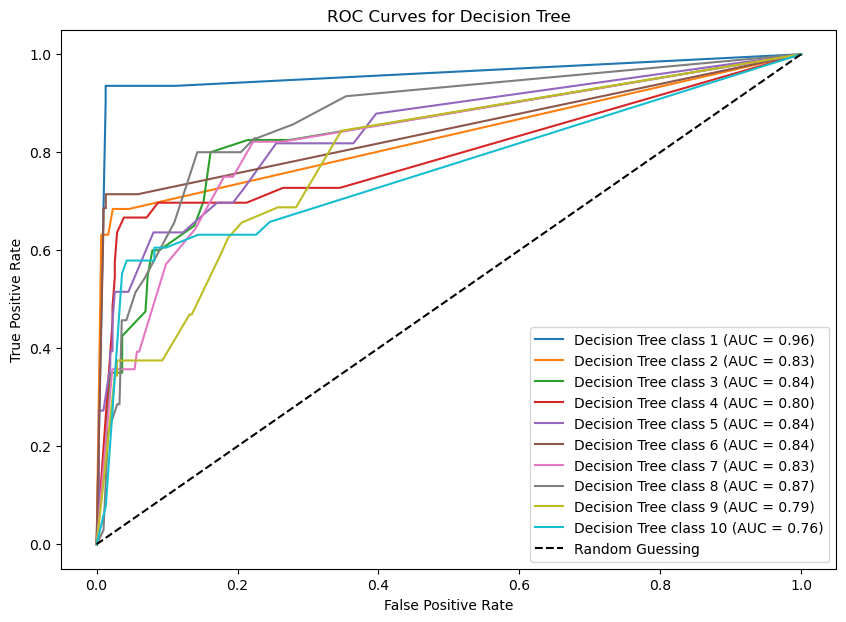

Performance Metrics for K-Nearest Neighbors
Accuracy: 0.22
Precision: 0.20
Recall: 0.22
F1-Score: 0.15
AUC Score: 0.61



c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


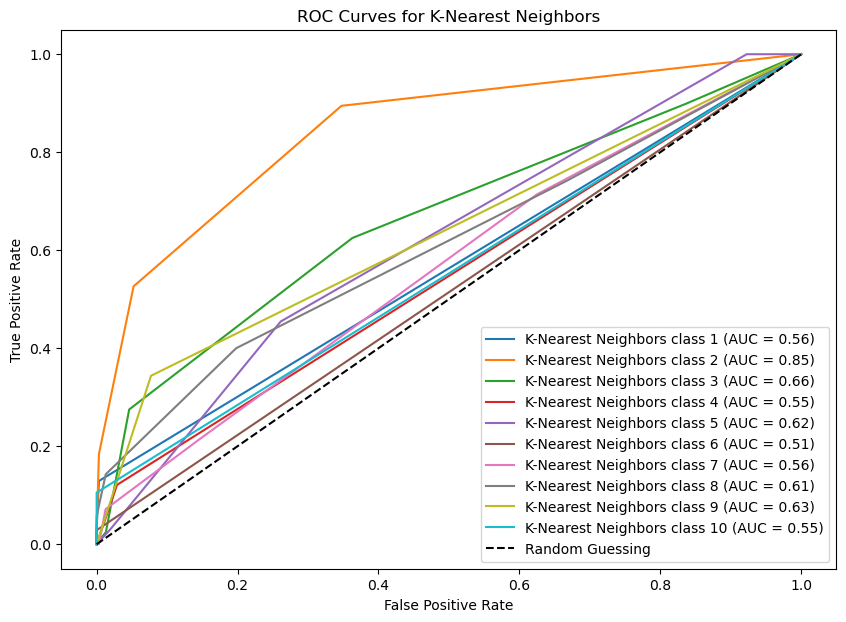

In [4]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]

# MLP Classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp_best = GridSearchCV(mlp, mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
mlp_best.fit(x_train_scaled, y_train)
mlp_y_pred = mlp_best.predict(x_test_scaled)
mlp_y_score = mlp_best.predict_proba(x_test_scaled)
display_metrics("MLP Classifier", y_test, mlp_y_pred, y_test_binarized, mlp_y_score)
plot_roc_curves_multiclass(y_test_binarized, mlp_y_score, "MLP Classifier", n_classes)

# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
nb_y_pred = nb.predict(x_test_scaled)
nb_y_score = nb.predict_proba(x_test_scaled)
display_metrics("Gaussian Naive Bayes", y_test, nb_y_pred, y_test_binarized, nb_y_score)
plot_roc_curves_multiclass(y_test_binarized, nb_y_score, "Gaussian Naive Bayes", n_classes)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt_best = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
dt_best.fit(x_train_scaled, y_train)
dt_y_pred = dt_best.predict(x_test_scaled)
dt_y_score = dt_best.predict_proba(x_test_scaled)
display_metrics("Decision Tree", y_test, dt_y_pred, y_test_binarized, dt_y_score)
plot_roc_curves_multiclass(y_test_binarized, dt_y_score, "Decision Tree", n_classes)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
knn_y_pred = knn.predict(x_test_scaled)
knn_y_score = knn.predict_proba(x_test_scaled)
display_metrics("K-Nearest Neighbors", y_test, knn_y_pred, y_test_binarized, knn_y_score)
plot_roc_curves_multiclass(y_test_binarized, knn_y_score, "K-Nearest Neighbors", n_classes)



In [5]:
models_folder = "models"

# Check if the folder exists, if not, create it
if not os.path.exists(models_folder):
    os.makedirs(models_folder)


with open(os.path.join(models_folder, "MLP-model.pkl"), "wb") as f:
    pickle.dump(mlp_best, f)

with open(os.path.join(models_folder, "NB-model.pkl"), "wb") as f:
    pickle.dump(nb, f)

with open(os.path.join(models_folder, "DT-model.pkl"), "wb") as f:
    pickle.dump(dt_best, f)

with open(os.path.join(models_folder, "KNN-model.pkl"), "wb") as f:
    pickle.dump(knn, f)

print("Models saved successfully in the 'models' folder.")

Models saved successfully in the 'models' folder.
